# **Indian Electric Vehicle Market Analysis**

In [23]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Loading the Data into Data Frames
date_df = pd.read_csv("dim_date.csv")
sales_by_maker_df = pd.read_csv("electric_vehicle_sales_by_makers.csv")
sales_by_state_df = pd.read_csv("electric_vehicle_sales_by_state.csv")

## ***Data Understanding and Preparation***

date_df Structure:
- date: The specific date for which the data is relevant. Format: DD-MM-YY. (Data is recorded on a monthly basis)
- fiscal_year: The fiscal year to which the date belongs. This is useful for financial and business analysis.
- quarter: The fiscal quarter to which the date belongs. Fiscal quarters are typically divided as Q1, Q2, Q3, and Q4.

In [25]:
date_df.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [26]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


sales_by_maker_df Structure:
- date: The date on which the sales data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- maker: The name of the manufacturer or brand of the electric vehicle.
- electric_vehicles_sold: The number of electric vehicles sold by the specified maker in the given category on the given date.

In [27]:
sales_by_maker_df.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [28]:
sales_by_maker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


sales_by_state_df Structure:
- date: The date on which the data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- state: The name of the state where the sales data is recorded. This indicates the geographical location within India.
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- electric_vehicles_sold: The number of electric vehicles sold in the specified state and category on the given date.
- total_vehicles_sold: The total number of vehicles (including both electric and non-electric) sold in the specified state and category on the given date.

In [29]:
sales_by_state_df.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [30]:
sales_by_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


## ***Data Cleaning and Transformation***

1. *Checking for Duplicated entries in Dataframes*

In [68]:
print("duplicated entries in date_df =" , date_df.duplicated().sum())
print("duplicated entries in sales_by_maker_df =" , sales_by_maker_df.duplicated().sum())
print("duplicated entries in sales_by_state_df =" , sales_by_state_df.duplicated().sum())

duplicated entries in date_df = 0
duplicated entries in sales_by_maker_df = 0
duplicated entries in sales_by_state_df = 0


In [69]:
# There are no duplicate entries in all three dataframes

2. *Checking duplicated entries in state names*

In [32]:
sales_by_state_df['state'].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh',
       'Andaman & Nicobar', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [70]:
# Andaman and Nicobar Island has been duplicated. we have to change the duplicated entries to standardize the data.

In [33]:
# Replace 'Andaman & Nicobar' with 'Andaman & Nicobar Island'
sales_by_state_df['state'] = sales_by_state_df['state'].replace('Andaman & Nicobar', 'Andaman & Nicobar Island')

3. *Checking Duplicated entries in Makers names*

In [34]:
sales_by_maker_df['maker'].unique()

array(['OLA ELECTRIC', 'OKAYA EV', 'BYD India', 'PCA Automobiles',
       'BMW India', 'Volvo Auto India', 'KIA Motors', 'Mercedes -Benz AG',
       'Tata Motors', 'MG Motor', 'Mahindra & Mahindra', 'Hyundai Motor',
       'HERO ELECTRIC', 'OKINAWA', 'AMPERE', 'ATHER', 'PURE EV', 'TVS',
       'REVOLT', 'BAJAJ', 'BEING', 'JITENDRA', 'OTHERS', 'BGAUSS',
       'BATTRE ELECTRIC', 'KINETIC GREEN'], dtype=object)

In [71]:
# There are no duplicated names of manufacturers in the dataframe

In [72]:
# Convert date columns to datetime object
date_df['date'] = pd.to_datetime(date_df['date'], format='%d-%b-%y')
sales_by_maker_df['date'] = pd.to_datetime(sales_by_maker_df['date'], format='%d-%b-%y')
sales_by_state_df['date'] = pd.to_datetime(sales_by_state_df['date'], format='%d-%b-%y')

In [36]:
# Export the cleaned DataFrames to CSV files
# date_df.to_csv('cleaned_dim_date.csv', index=False)
# sales_by_maker_df.to_csv('cleaned_sales_by_maker.csv', index=False)
# sales_by_state_df.to_csv('cleaned_sales_by_state.csv', index=False)

4. *Merging the Dataframes*

In [37]:
# Merge sales_by_maker_df with date_df to get fiscal_year and quarter
sales_by_maker_df = sales_by_maker_df.merge(date_df, on='date')

# Merge sales_by_state_df with date_df to get fiscal_year and quarter
sales_by_state_df = sales_by_state_df.merge(date_df, on='date')

## ***Exploratory Data Analysis (EDA)***

### A. **date_df analysis**

In [38]:
# How many years of data is present in df?
years = date_df['fiscal_year'].nunique()
print(f'Number of years of data: {years}')

# Finding unique entries for the year column
unique_years = date_df['fiscal_year'].unique()
print(f'Unique entries for fiscal year: {unique_years}')

# Finding the first and last date contained in the df
first_date = date_df['date'].min()
last_date = date_df['date'].max()
print(f'First date: {first_date}, Last date: {last_date}')

Number of years of data: 3
Unique entries for fiscal year: [2022 2023 2024]
First date: 2021-04-01 00:00:00, Last date: 2024-03-01 00:00:00


### B. **sales_by_maker_df analysis**

In [39]:
# How many unique makers in the data?
unique_makers_count = sales_by_maker_df['maker'].nunique()
print(f'Number of unique makers: {unique_makers_count}')

# Names of all the makers in the data?
unique_makers = sales_by_maker_df['maker'].unique()
print(f'Names of all makers: {unique_makers}')

Number of unique makers: 26
Names of all makers: ['OLA ELECTRIC' 'OKAYA EV' 'BYD India' 'PCA Automobiles' 'BMW India'
 'Volvo Auto India' 'KIA Motors' 'Mercedes -Benz AG' 'Tata Motors'
 'MG Motor' 'Mahindra & Mahindra' 'Hyundai Motor' 'HERO ELECTRIC'
 'OKINAWA' 'AMPERE' 'ATHER' 'PURE EV' 'TVS' 'REVOLT' 'BAJAJ' 'BEING'
 'JITENDRA' 'OTHERS' 'BGAUSS' 'BATTRE ELECTRIC' 'KINETIC GREEN']


In [40]:
# Describe the electric_vehicles_sold column to find out mean, median and other statistics.
description = sales_by_maker_df['electric_vehicles_sold'].describe()
print(description)

count      816.000000
mean      2531.998775
std       4771.077333
min          0.000000
25%         42.000000
50%        662.000000
75%       2636.500000
max      44630.000000
Name: electric_vehicles_sold, dtype: float64


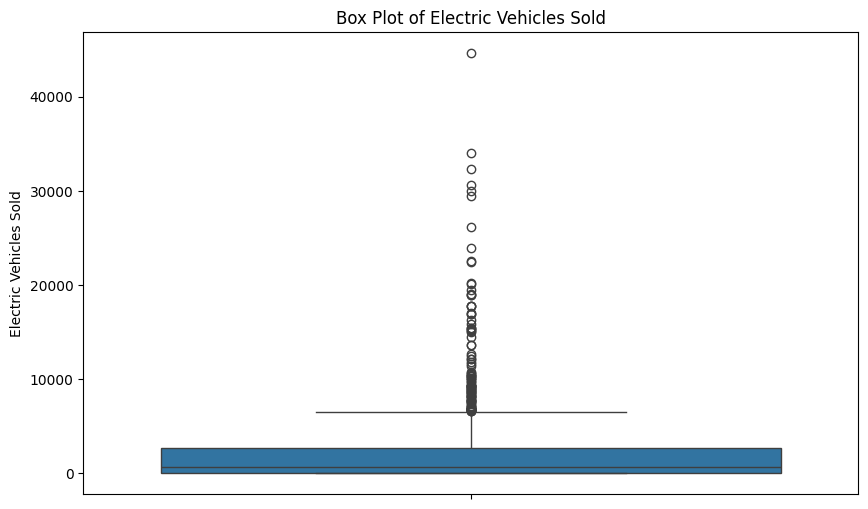

In [41]:
# Create a box plot for the electric_vehicles_sold data.
plt.figure(figsize=(10, 6))
sns.boxplot(y=sales_by_maker_df['electric_vehicles_sold'])
plt.title('Box Plot of Electric Vehicles Sold')
plt.ylabel('Electric Vehicles Sold')
plt.show()

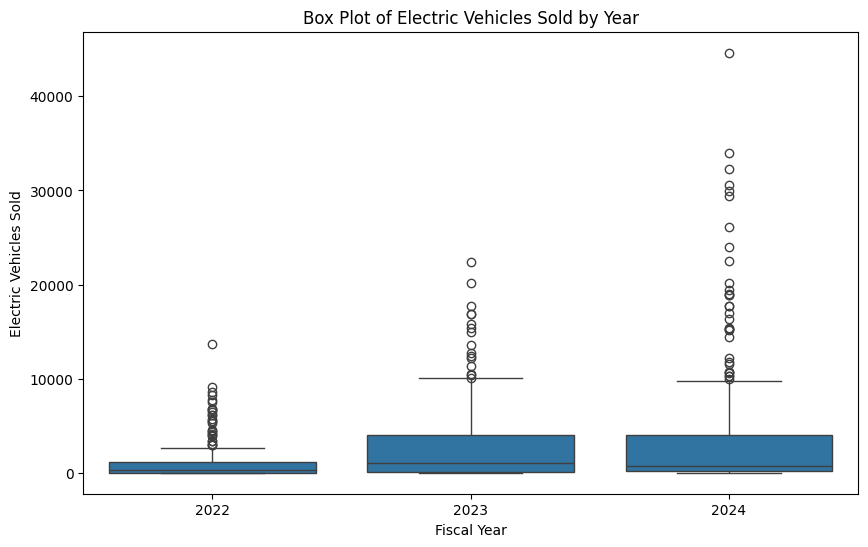

In [42]:
# Create a separate box plot for each year for the electric_vehicles_sold data.
plt.figure(figsize=(10, 6))
sns.boxplot(x='fiscal_year', y='electric_vehicles_sold', data=sales_by_maker_df)
plt.title('Box Plot of Electric Vehicles Sold by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Electric Vehicles Sold')
plt.show()

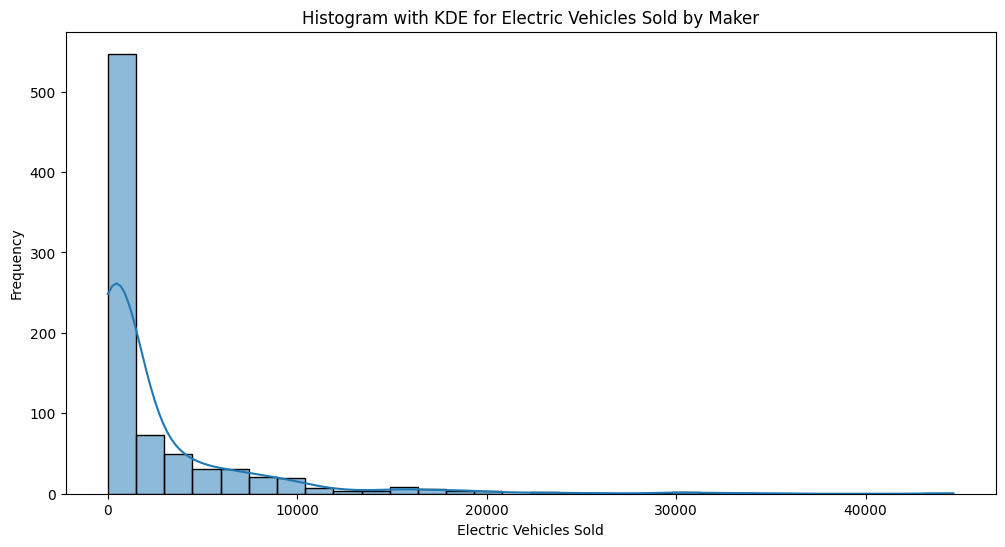

In [43]:
# Histogram with KDE for electric_vehicles_sold
plt.figure(figsize=(12, 6))
sns.histplot(sales_by_maker_df['electric_vehicles_sold'], kde=True, bins=30)
plt.title('Histogram with KDE for Electric Vehicles Sold by Maker')
plt.xlabel('Electric Vehicles Sold')
plt.ylabel('Frequency')
plt.show()

***Analyzing the box plot, Histogram and summary statistics for the electric_vehicles_sold column*** reveals that the mean sales figure is approximately 2,500, significantly lower than the maximum value of 44,000. This indicates that while a select few makers are performing exceptionally well, many others have sold relatively few vehicles over the observed period.

To gain deeper insights, we plotted box plots segmented by fiscal year. This analysis shows that while the mean sales have remained relatively stable, the maximum sales figures have increased substantially, rising from around 15,000 in FY2022 to approximately 44,000 in FY2024. This suggests that a few makers are experiencing impressive growth over the two-year span. Notably, the minimum sales figure remains at zero across all three years, indicating that some companies consistently underperform.

***Overall, these findings illustrate that the Indian EV market is growing rapidly, with certain makers in both the two-wheeler and four-wheeler segments successfully capitalizing on this expansion.***

### C. **sales_by_state_df analysis**

In [44]:
# How many unique states in the data?
unique_states_count = sales_by_state_df['state'].nunique()
print(f'Number of unique states: {unique_states_count}')

# Names of all the states in the data?
unique_states = sales_by_state_df['state'].unique()
print(f'Names of all states: {unique_states}')

Number of unique states: 34
Names of all states: ['Sikkim' 'Andaman & Nicobar Island' 'Arunachal Pradesh' 'Assam'
 'Chhattisgarh' 'DNH and DD' 'Jammu and Kashmir' 'Ladakh' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Puducherry' 'Tripura' 'Bihar'
 'Chandigarh' 'Delhi' 'Madhya Pradesh' 'Odisha' 'Punjab' 'Uttarakhand'
 'Himachal Pradesh' 'Haryana' 'Jharkhand' 'Andhra Pradesh' 'Goa' 'Gujarat'
 'Karnataka' 'Kerala' 'Maharashtra' 'Rajasthan' 'Tamil Nadu'
 'Uttar Pradesh' 'West Bengal']


In [45]:
# Describe the electric_vehicles_sold and total_vehicles_sold columns
ev_sold_description = sales_by_state_df['electric_vehicles_sold'].describe()
total_vehicles_sold_description = sales_by_state_df['total_vehicles_sold'].describe()
print("Electric Vehicles Sold Description:\n", ev_sold_description)
print("\nTotal Vehicles Sold Description:\n", total_vehicles_sold_description)

Electric Vehicles Sold Description:
 count     2445.000000
mean       845.035174
std       2185.167744
min          0.000000
25%          2.000000
50%         54.000000
75%        534.000000
max      26668.000000
Name: electric_vehicles_sold, dtype: float64

Total Vehicles Sold Description:
 count      2445.000000
mean      23402.966053
std       38353.266389
min           1.000000
25%        1158.000000
50%        6098.000000
75%       29396.000000
max      387983.000000
Name: total_vehicles_sold, dtype: float64


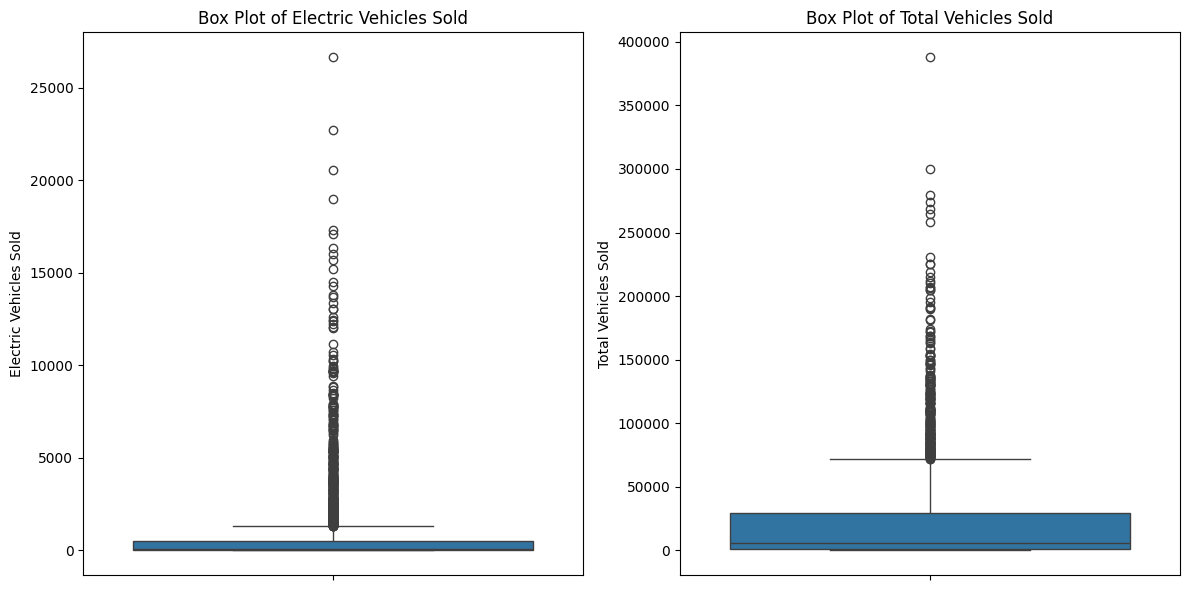

In [46]:
# Create box plots for the electric_vehicles_sold and total_vehicles_sold data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=sales_by_state_df['electric_vehicles_sold'])
plt.title('Box Plot of Electric Vehicles Sold')
plt.ylabel('Electric Vehicles Sold')

plt.subplot(1, 2, 2)
sns.boxplot(y=sales_by_state_df['total_vehicles_sold'])
plt.title('Box Plot of Total Vehicles Sold')
plt.ylabel('Total Vehicles Sold')

plt.tight_layout()
plt.show()

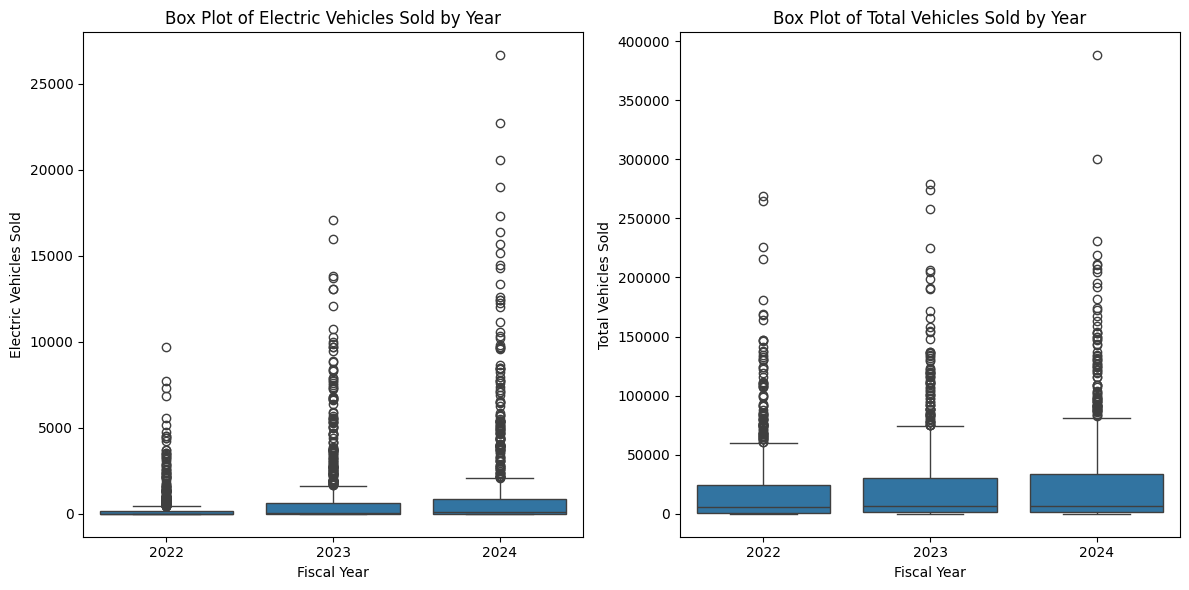

In [47]:
# Create separate box plots for each year for electric_vehicles_sold and total_vehicles_sold
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='fiscal_year', y='electric_vehicles_sold', data=sales_by_state_df)
plt.title('Box Plot of Electric Vehicles Sold by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Electric Vehicles Sold')

plt.subplot(1, 2, 2)
sns.boxplot(x='fiscal_year', y='total_vehicles_sold', data=sales_by_state_df)
plt.title('Box Plot of Total Vehicles Sold by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Vehicles Sold')

plt.tight_layout()
plt.show()

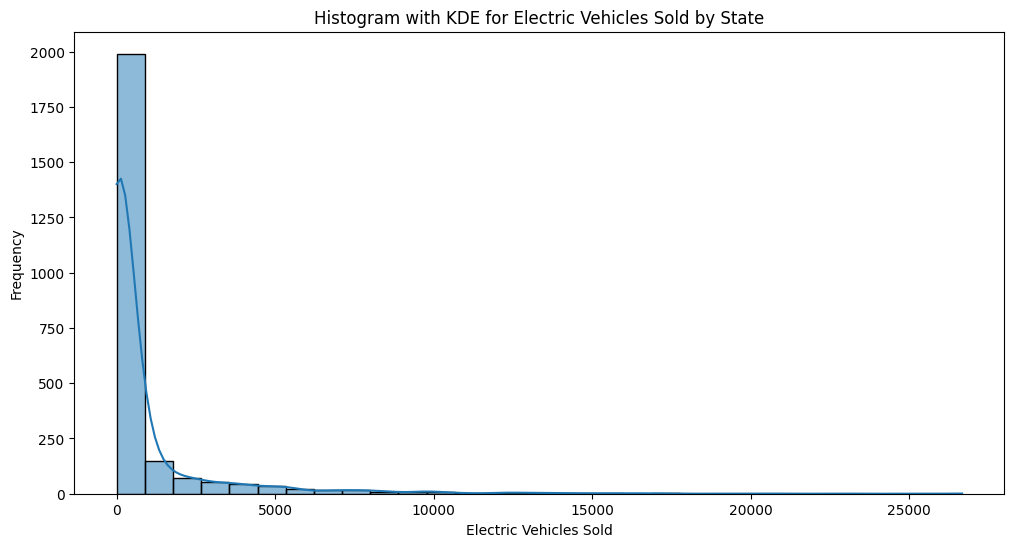

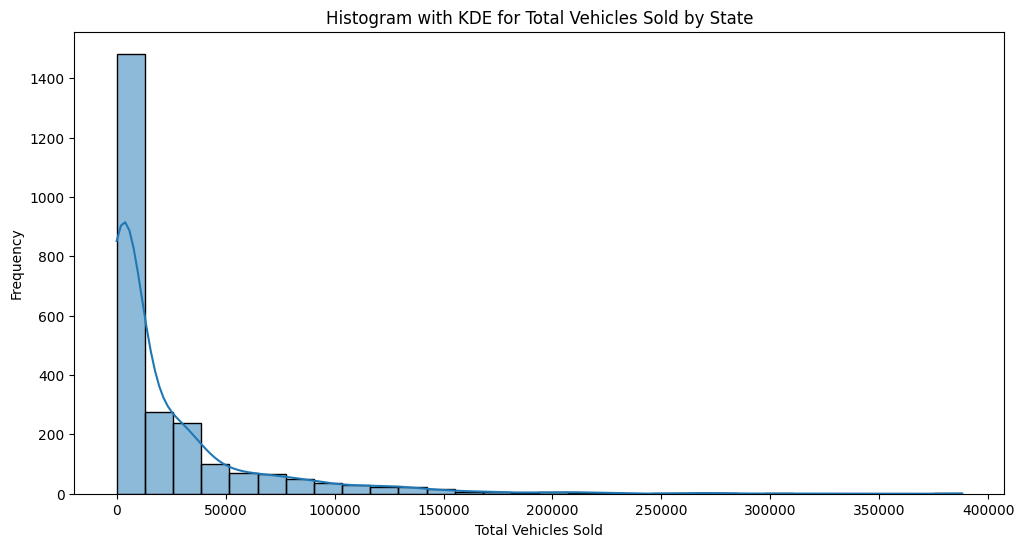

In [48]:
# Histogram with KDE for electric_vehicles_sold
plt.figure(figsize=(12, 6))
sns.histplot(sales_by_state_df['electric_vehicles_sold'], kde=True, bins=30)
plt.title('Histogram with KDE for Electric Vehicles Sold by State')
plt.xlabel('Electric Vehicles Sold')
plt.ylabel('Frequency')
plt.show()

# Histogram with KDE for total_vehicles_sold
plt.figure(figsize=(12, 6))
sns.histplot(sales_by_state_df['total_vehicles_sold'], kde=True, bins=30)
plt.title('Histogram with KDE for Total Vehicles Sold by State')
plt.xlabel('Total Vehicles Sold')
plt.ylabel('Frequency')
plt.show()

Similar to the findings from the makers' data, the mean values for both electric vehicles sold and total vehicles sold are significantly lower than their maximum values, indicating that some states outperform others in terms of sales.

One notable observation in the electric vehicles sold data is the narrow width of the box plot, which indicates that the 25th and 75th percentiles are closely clustered and significantly below the maximum value. This suggests that ***fewer than 25% of the states exceed the average electric vehicle sales, highlighting a disparity in performance.***

The year-wise box plot for electric vehicle sales reveals a similar steep increase from 2022 to 2024, mirroring the trends observed in the makers' data. This suggests that ***certain states are consistently achieving higher sales and that the electric vehicle market is experiencing accelerated growth in these regions.***

In contrast, the year-wise box plot for total vehicle sales shows minimal fluctuations in both mean and maximum values. This indicates that ***while some states consistently outperform others in total vehicle sales, the overall Indian vehicle market has not experienced significant growth over the past three years.***

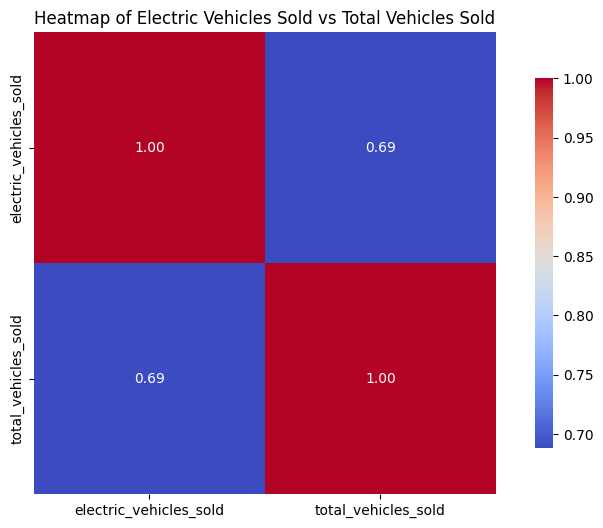

In [49]:
# Create a heatmap to check the relationship between electric vehicle sales and total vehicle sales
plt.figure(figsize=(10, 6))
correlation_matrix = sales_by_state_df[['electric_vehicles_sold', 'total_vehicles_sold']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Electric Vehicles Sold vs Total Vehicles Sold')
plt.show()

The heatmap reveals a correlation coefficient of 0.69 between electric vehicle sales and total vehicle sales, indicating a ***strong positive relationship between the two variables.*** This suggests that ***states with higher total vehicle sales tend to also have higher electric vehicle sales.*** The relatively high correlation may imply that factors driving overall vehicle sales, such as population density, economic conditions, or infrastructure development, also positively influence the adoption of electric vehicles in those regions.

## ***Electric Vehicles(EVs) Market Analysis***

#### **QUE 1: List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.**

In [50]:
# Filter data for 2-wheelers and FY 2023 and 2024
two_wheeler_sales = sales_by_maker_df[sales_by_maker_df['vehicle_category'] == '2-Wheelers']
fy_2023_2024_sales = two_wheeler_sales[two_wheeler_sales['fiscal_year'].isin([2023, 2024])]

# Group by maker and fiscal_year, then sum sales
maker_sales = fy_2023_2024_sales.groupby(['maker', 'fiscal_year'])['electric_vehicles_sold'].sum().reset_index()

# Separate data for each fiscal year
fy_2023_sales = maker_sales[maker_sales['fiscal_year'] == 2023]
fy_2024_sales = maker_sales[maker_sales['fiscal_year'] == 2024]

# Get top 3 and bottom 3 makers for fiscal year 2023
top_3_fy_2023 = fy_2023_sales.nlargest(3, 'electric_vehicles_sold').reset_index()
bottom_3_fy_2023 = fy_2023_sales.nsmallest(3, 'electric_vehicles_sold').reset_index()

# Get top 3 and bottom 3 makers for fiscal year 2024
top_3_fy_2024 = fy_2024_sales.nlargest(3, 'electric_vehicles_sold').reset_index()
bottom_3_fy_2024 = fy_2024_sales.nsmallest(3, 'electric_vehicles_sold').reset_index()


print("Top 3 makers for FY 2023: \n", top_3_fy_2023[['maker', 'electric_vehicles_sold']], "\n")
print("Bottom 3 makers for FY 2023: \n", bottom_3_fy_2023[['maker', 'electric_vehicles_sold']], "\n")
print("Top 3 makers for FY 2024: \n", top_3_fy_2024[['maker', 'electric_vehicles_sold']], "\n")
print("Bottom 3 makers for FY 2024: \n", bottom_3_fy_2024[['maker', 'electric_vehicles_sold']])

Top 3 makers for FY 2023: 
            maker  electric_vehicles_sold
0   OLA ELECTRIC                  152583
1        OKINAWA                   96945
2  HERO ELECTRIC                   88993 

Bottom 3 makers for FY 2023: 
       maker  electric_vehicles_sold
0  JITENDRA                    8563
1     BEING                   11018
2   PURE EV                   11556 

Top 3 makers for FY 2024: 
           maker  electric_vehicles_sold
0  OLA ELECTRIC                  322489
1           TVS                  180743
2         ATHER                  107552 

Bottom 3 makers for FY 2024: 
              maker  electric_vehicles_sold
0  BATTRE ELECTRIC                    4841
1           REVOLT                    7254
2    KINETIC GREEN                    9585


#### **QUE 2: Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.**

In [51]:
# Filter data for FY 2024
sales_2024 = sales_by_state_df[sales_by_state_df['fiscal_year'] == 2024]

# drop the columns we dont need
sales_2024 = sales_2024.drop(['date', 'quarter', 'fiscal_year'], axis=1)

# group by state and vehicel category to calculate the total sales
grouped_sales_2024 = sales_2024.groupby(['state', 'vehicle_category']).sum().reset_index()

# Calculate penetration rate
grouped_sales_2024['penetration_rate (%)'] = (grouped_sales_2024['electric_vehicles_sold'] / grouped_sales_2024['total_vehicles_sold']) * 100

# Top 5 states for 2-wheelers
top_5_2w_states = grouped_sales_2024[grouped_sales_2024['vehicle_category'] == '2-Wheelers'].nlargest(5, 'penetration_rate (%)').reset_index()

# Top 5 states for 4-wheelers
top_5_4w_states = grouped_sales_2024[grouped_sales_2024['vehicle_category'] == '4-Wheelers'].nlargest(5, 'penetration_rate (%)').reset_index()

*Top 5 states with highest penetration rate of 2-wheeler EVs*

In [52]:
top_5_2w_states[['state', 'electric_vehicles_sold','total_vehicles_sold','penetration_rate (%)']]

,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate (%)
0,Goa,9768,54290,17.992264
1,Kerala,64769,478887,13.524903
2,Karnataka,148111,1279767,11.573279
3,Maharashtra,183052,1817343,10.072507
4,Delhi,38094,405218,9.400866


*Top 5 states with highest penetration rate of 4-wheeler EVs*

In [53]:
top_5_4w_states[['state', 'electric_vehicles_sold','total_vehicles_sold','penetration_rate (%)']]

,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate (%)
0,Kerala,9169,159227,5.758445
1,Chandigarh,1020,22651,4.503112
2,Delhi,8630,201130,4.290757
3,Karnataka,12878,302221,4.261120
4,Goa,1031,24234,4.254353


#### **QUE 3: List the states with negative penetration (decline) in EV sales from 2022 to 2024?**

In [54]:
# drop the columns we dont need and make new df for calculating the penetration rate
sales_sum = sales_by_state_df.drop(['date', 'quarter', 'vehicle_category'], axis=1)

# group by state and fiscal year to calculate the total sales
sales_sum = sales_sum.groupby(['state', 'fiscal_year']).sum().reset_index()

# Calculate penetration rate for each year
sales_sum['penetration_rate'] = (sales_sum['electric_vehicles_sold'] / sales_sum['total_vehicles_sold']) * 100

# Pivot to have years as columns
penetration_pivot = sales_sum.pivot_table(index='state', columns='fiscal_year', values='penetration_rate').reset_index()

# Identify states with decline from 2022 to 2024
decline_states_2023 = penetration_pivot[penetration_pivot[2023] < penetration_pivot[2022]]
decline_states_2024 = penetration_pivot[penetration_pivot[2024] < penetration_pivot[2023]]

# Calculate the decline percentage
decline_states_2023['Percentage Decline (%)'] = ((decline_states_2023[2022]-decline_states_2023[2023]) / decline_states_2023[2022]) * 100
decline_states_2024['Percentage Decline (%)'] = ((decline_states_2024[2023]-decline_states_2024[2024]) / decline_states_2024[2023]) * 100

C:\Users\patil\AppData\Local\Temp\ipykernel_14836\2944168982.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decline_states_2023['Percentage Decline (%)'] = ((decline_states_2023[2022]-decline_states_2023[2023]) / decline_states_2023[2022]) * 100
C:\Users\patil\AppData\Local\Temp\ipykernel_14836\2944168982.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decline_states_2024['Percentage Decline (%)'] = ((decline_states_2024[2023]-decline_states_2024[2024]) / decline_states_2024[2023]) * 100


*states with negative penetration rate in FY 2023 as compared to FY 2022*

In [55]:
decline_states_2023[['state', 2022, 2023, 'Percentage Decline (%)']]

fiscal_year,state,2022,2023,Percentage Decline (%)
0,Andaman & Nicobar Island,0.42735,0.352005,17.630854


*states with negative penetration rate in FY 2024 as compared to FY 2023*

In [56]:
decline_states_2024[['state', 2023, 2024, 'Percentage Decline (%)']]

fiscal_year,state,2023,2024,Percentage Decline (%)
10,Gujarat,5.487563,5.302306,3.375935
11,Haryana,2.036602,1.611002,20.897572
12,Himachal Pradesh,1.003490,0.895084,10.802946
14,Jharkhand,1.727833,1.581783,8.452759
27,Rajasthan,5.668529,5.109206,9.867152
32,Uttarakhand,3.103600,2.718018,12.423680


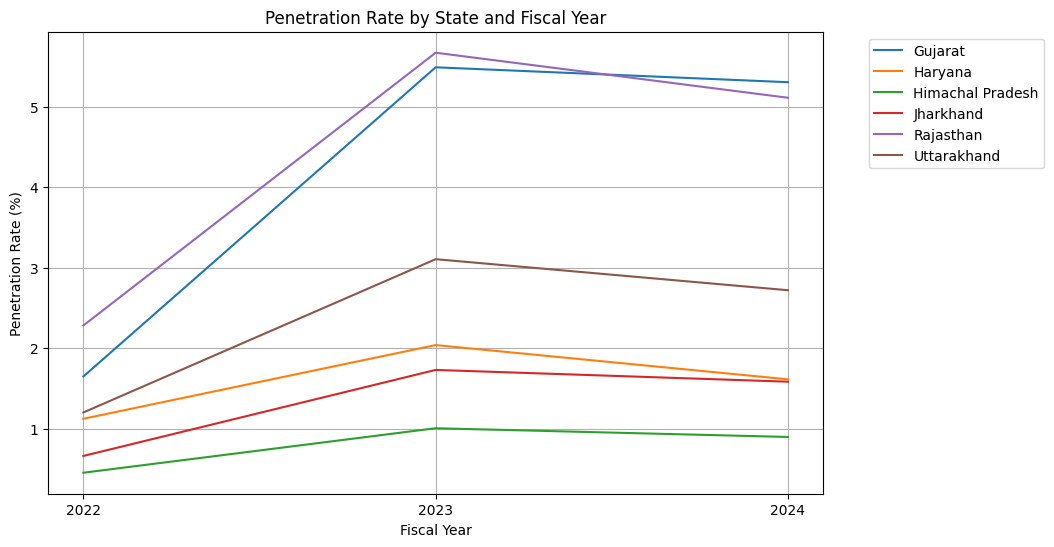

In [57]:
decline_states_2024 = decline_states_2024.drop('Percentage Decline (%)', axis=1)

# Plotting the penetration table
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all states' penetration rates for 2022 and 2024
for state in decline_states_2024['state']:
    ax.plot(['2022', '2023', '2024'], decline_states_2024[decline_states_2024['state'] == state].iloc[:, 1:].values.flatten(), label=state)

ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Penetration Rate (%)')
ax.set_title('Penetration Rate by State and Fiscal Year')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(['2022', '2023', '2024'])
plt.grid(True)
# plt.tight_layout()
plt.show()

#### **QUE 4 : What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?**

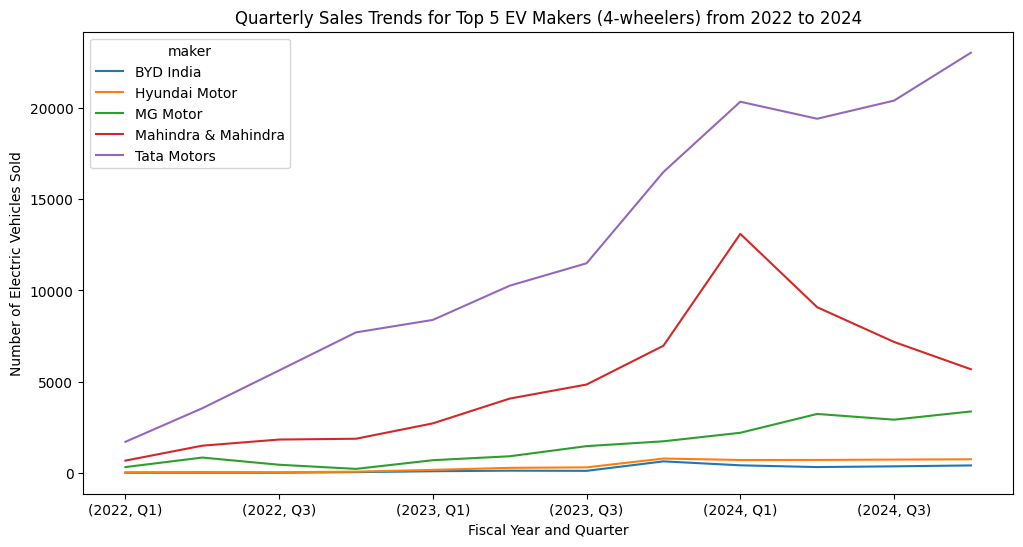

In [58]:
# Filter for 4-wheelers
four_wheeler_sales = sales_by_maker_df[sales_by_maker_df['vehicle_category'] == '4-Wheelers']

# Group by maker and sum sales over all years
top_5_makers = four_wheeler_sales.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index

# Filter data for these top 5 makers
top_5_makers_sales = four_wheeler_sales[four_wheeler_sales['maker'].isin(top_5_makers)]

# Group by quarter and fiscal year
quarterly_trends = top_5_makers_sales.groupby(['fiscal_year', 'quarter', 'maker'])['electric_vehicles_sold'].sum().unstack().fillna(0)

# Plotting the trends
quarterly_trends.plot(kind='line', stacked=True, figsize=(12, 6))
plt.title('Quarterly Sales Trends for Top 5 EV Makers (4-wheelers) from 2022 to 2024')
plt.xlabel('Fiscal Year and Quarter')
plt.ylabel('Number of Electric Vehicles Sold')
plt.show()

In [59]:
quarterly_trends

maker                BYD India  Hyundai Motor  MG Motor  Mahindra & Mahindra  \
fiscal_year quarter                                                            
2022        Q1               0             25       285                  355   
            Q2               0             34       798                  651   
            Q3               1             25       411                 1383   
            Q4              32             26       153                 1653   
2023        Q1              81             75       531                 2020   
            Q2             113            155       635                 3164   
            Q3             103            191      1165                 3378   
            Q4             623            155       946                 5243   
2024        Q1             406            292      1493                10911   
            Q2             310            390      2524                 5855   
            Q3             350            370      2190                 4264   
            Q4             400            338      2622                 2316   

maker                Tata Motors  
fiscal_year quarter               
2022        Q1              1031  
            Q2              2052  
            Q3              3791  
            Q4              5834  
2023        Q1              5675  
            Q2              6192  
            Q3              6651  
            Q4              9528  
2024        Q1              7247  
            Q2             10337  
            Q3             13236  
            Q4             17361

#### **QUE 5 : How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?**

In [60]:
# Filter for 2024
sales_2024 = sales_by_state_df[sales_by_state_df['fiscal_year'] == 2024]

# Filter for Delhi and Karnataka
delhi_karnataka_sales = sales_2024[sales_2024['state'].isin(['Delhi', 'Karnataka'])]

# Drop unnecessary columns
delhi_karnataka_sales = delhi_karnataka_sales.drop(['date', 'vehicle_category', 'quarter'], axis=1)

# groupby state and fiscal year and calculate the total sales
delhi_karnataka_sales = delhi_karnataka_sales.groupby(['state', 'fiscal_year']).sum().reset_index()

# Calculate penetration rate
delhi_karnataka_sales['penetration_rate'] = (delhi_karnataka_sales['electric_vehicles_sold'] / delhi_karnataka_sales['total_vehicles_sold']) * 100

delhi_karnataka_sales

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,penetration_rate
0,Delhi,2024,46724,606348,7.705806
1,Karnataka,2024,160989,1581988,10.176373


#### **QUE 6 : List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.**

In [61]:
# Helper function to calculate CAGR
def calculate_cagr(start_value, end_value, periods):
    # Check for zero or None values to avoid division by zero
    if start_value is None or start_value == 0:
        start_value = 1
    if end_value is None or end_value == 0:
        end_value = 1
    return (end_value / start_value) ** (1 / periods) - 1

# Filter for 4-wheelers
four_wheeler_sales = sales_by_maker_df[sales_by_maker_df['vehicle_category'] == '4-Wheelers']

# Sum sales for 2022 and 2024
sales_2022_2024 = four_wheeler_sales[four_wheeler_sales['fiscal_year'].isin([2022, 2024])]
sales_by_maker_2022_2024 = sales_2022_2024.groupby(['maker', 'fiscal_year'])['electric_vehicles_sold'].sum().unstack().reset_index()

sales_by_maker_2022_2024 = sales_by_maker_2022_2024.fillna(1)

# Calculate CAGR
sales_by_maker_2022_2024['CAGR'] = sales_by_maker_2022_2024.apply(lambda row: calculate_cagr(row[2022], row[2024], 2), axis=1)

# Top 5 makers by 2024 sales
top_5_makers_2024 = sales_by_maker_2022_2024.nlargest(5, 'CAGR').reset_index()

top_5_makers_2024[['maker', 'CAGR']]

fiscal_year,maker,CAGR
0,PCA Automobiles,38.153544
1,KIA Motors,17.110770
2,BMW India,11.409674
3,Volvo Auto India,9.712143
4,BYD India,5.665151


#### **QUE 7 : List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.**

In [62]:
# Sum total vehicles sold for 2022 and 2024
total_sales_2022_2024 = sales_by_state_df[sales_by_state_df['fiscal_year'].isin([2022, 2024])]

total_sales_2022_2024 = total_sales_2022_2024.fillna(1)

total_sales_by_state = total_sales_2022_2024.groupby(['state', 'fiscal_year'])['total_vehicles_sold'].sum().unstack().reset_index()

# Calculate CAGR
total_sales_by_state['CAGR'] = total_sales_by_state.apply(lambda row: calculate_cagr(row[2022], row[2024], 2), axis=1)

# Top 10 states by CAGR
top_10_states_cagr = total_sales_by_state.nlargest(10, 'CAGR').reset_index()


top_10_states_cagr[['state', 'CAGR']]

fiscal_year,state,CAGR
0,Meghalaya,0.284691
1,Goa,0.274102
2,Karnataka,0.252836
3,Delhi,0.228843
4,Rajasthan,0.214974
5,Gujarat,0.205457
6,Assam,0.201337
7,Mizoram,0.187716
8,Arunachal Pradesh,0.183034
9,Andaman & Nicobar Island,0.182871


#### **QUE 8 : What are the peak and low season months for EV sales based on the data from 2022 to 2024?**

In [63]:
# Extract month from date
sales_by_state_df['month'] = sales_by_state_df['date'].dt.month_name()

# Group by month and sum sales
monthly_sales = sales_by_state_df.groupby(['month'])['electric_vehicles_sold'].sum().reset_index()

# Identify peak and low months
peak_month = monthly_sales.nlargest(1, 'electric_vehicles_sold')
low_month = monthly_sales.nsmallest(1, 'electric_vehicles_sold')
print(f"Peak Month: {peak_month['month'].values[0]}, Sales: {peak_month['electric_vehicles_sold'].values[0]}")
print(f"Low Month: {low_month['month'].values[0]}, Sales: {low_month['electric_vehicles_sold'].values[0]}")

monthly_sales

Peak Month: March, Sales: 291587
Low Month: June, Sales: 106709


,month,electric_vehicles_sold
0,April,134657
1,August,141961
2,December,180401
3,February,198049
4,January,189099
5,July,127426
6,June,106709
7,March,291587
8,May,159869
9,November,205196


C:\Users\patil\AppData\Local\Temp\ipykernel_14836\2650437335.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month'] + ' 2023')


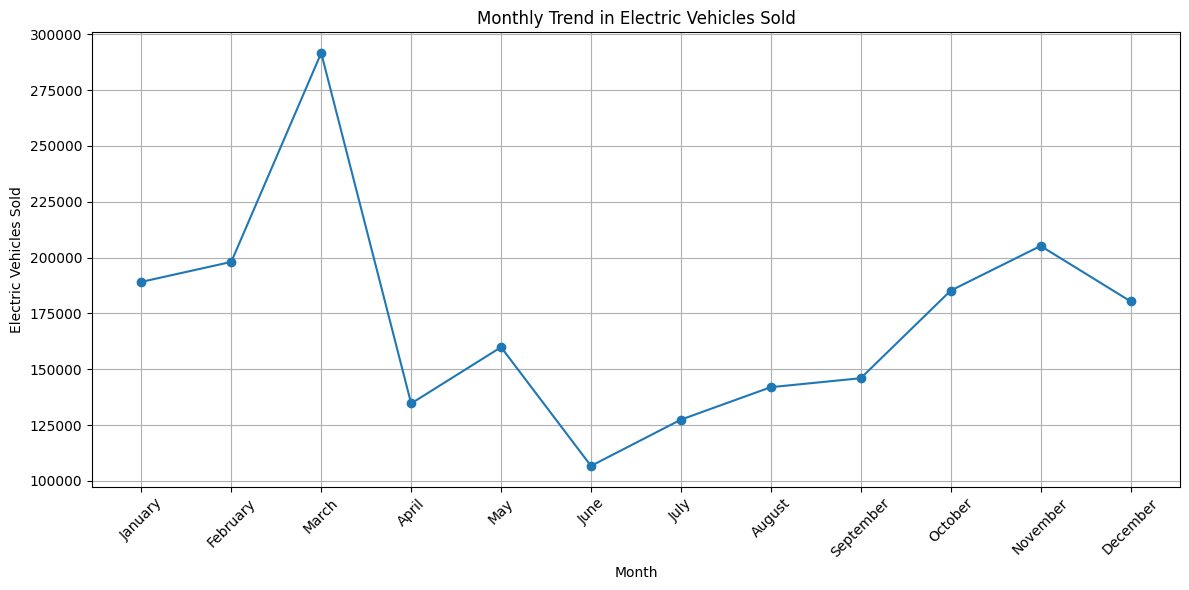

In [64]:
# Sort by the month-year for proper trend visualization
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month'] + ' 2023')
monthly_sales = monthly_sales.sort_values('month_year')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['electric_vehicles_sold'], marker='o')
plt.title('Monthly Trend in Electric Vehicles Sold')
plt.xlabel('Month')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\patil\AppData\Local\Temp\ipykernel_14836\3058633408.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'])


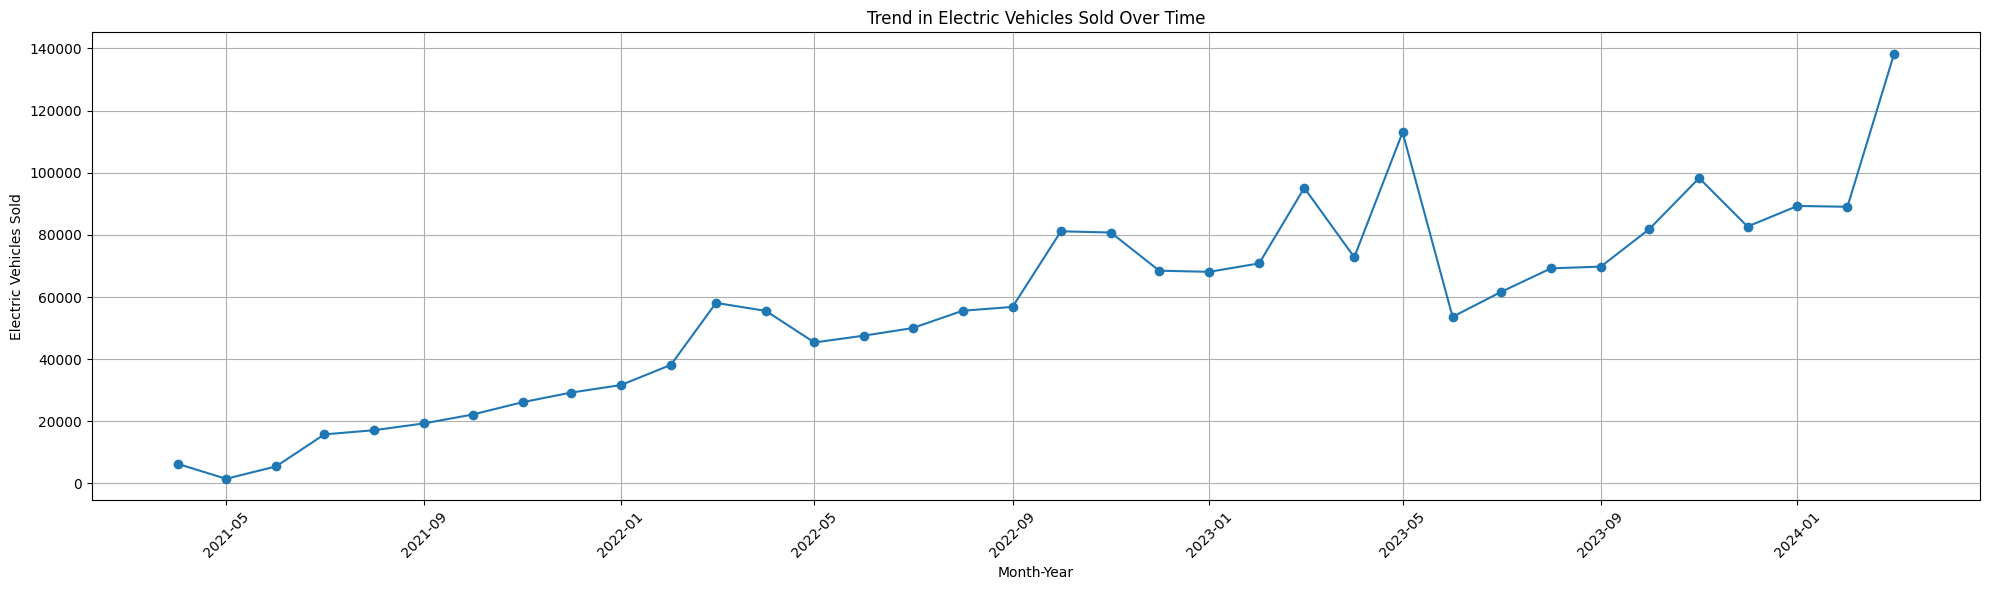

In [65]:
# Create a new column for month-year
sales_by_state_df['month_year'] = sales_by_state_df['date'].dt.strftime('%b %Y')

# Group by the new month-year column and sum sales
monthly_sales = sales_by_state_df.groupby('month_year')['electric_vehicles_sold'].sum().reset_index()

# Sort by the month-year for proper trend visualization
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'])
monthly_sales = monthly_sales.sort_values('month_year')

plt.figure(figsize=(20, 6))
plt.plot(monthly_sales['month_year'], monthly_sales['electric_vehicles_sold'], marker='o')
plt.title('Trend in Electric Vehicles Sold Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#### **QUE 9: What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?**

In [66]:
# Calculate the current penetration rate (2024) for each state.
projection_sales = sales_by_state_df.drop(['date', 'vehicle_category','quarter','month','month_year'], axis=1)
projection_sales = projection_sales[projection_sales['fiscal_year'].isin([2022, 2024])]
projection_sales = projection_sales.groupby(['state', 'fiscal_year']).sum().reset_index()
projection_sales['penetration_rate']  = (projection_sales['electric_vehicles_sold']/projection_sales['total_vehicles_sold']) * 100

# Calculate the CAGR for the penetration rate from 2022 to 2024.
pivoted_projection_sales = projection_sales.groupby(['state', 'fiscal_year'])['penetration_rate'].mean().unstack().reset_index()
pivoted_projection_sales['CAGR'] = pivoted_projection_sales.apply(lambda row: calculate_cagr(row[2022], row[2024], 2), axis=1)

# Project the penetration rate for 2030 using the CAGR.
pivoted_projection_sales['projected_penetration_2030'] = pivoted_projection_sales[2024] * ((1 + pivoted_projection_sales['CAGR'])**6)

# Identify the top 10 states with the highest projected penetration rate for 2030.
top_10_states_projected_penetration = pivoted_projection_sales.nlargest(10, 'projected_penetration_2030')

# Filter the current sales data (2024) for these top 10 states.
top_10_states_projected_sales = projection_sales[projection_sales['state'].isin(top_10_states_projected_penetration['state'])]

# Calculate the sales CAGR from 2022 to 2024 for these states.
top_10_states_projected_sales = top_10_states_projected_sales.drop(['total_vehicles_sold','penetration_rate'], axis=1)
top_10_states_projected_sales = top_10_states_projected_sales.groupby(['state', 'fiscal_year'])['electric_vehicles_sold'].mean().unstack().reset_index()
top_10_states_projected_sales['CAGR'] = top_10_states_projected_sales.apply(lambda row: calculate_cagr(row[2022], row[2024], 2), axis=1)

# Project the sales for 2030 using the sales CAGR.
top_10_states_projected_sales['projected_EV_Sales_2030'] = top_10_states_projected_sales[2024] * ((1 + top_10_states_projected_sales['CAGR'])**6)

# selecting only required columns
df_selected = top_10_states_projected_sales[['state', 'projected_EV_Sales_2030']].copy()
df_selected['projected_EV_Sales_2030'] = df_selected['projected_EV_Sales_2030'].apply(lambda x: f"{x:,.0f}")

df_selected


fiscal_year,state,projected_EV_Sales_2030
0,Chandigarh,"986,811"
1,Chhattisgarh,"7,118,219"
2,Goa,"2,419,574"
3,Kerala,"11,779,401"
4,Madhya Pradesh,"7,036,266"
5,Maharashtra,"13,351,146"
6,Manipur,"16,131"
7,Meghalaya,"4,889,074"
8,Tripura,"389,063"
9,West Bengal,"4,178,395"


#### **QUE 10: Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price.**

Average Unit Price based on the vehicle category: 
  2-Wheelers -          85000,
  4-Wheelers -         1500000

In [67]:
# Calculate sales for 2022, 2023, and 2024
sales_by_year_category = sales_by_state_df.groupby(['fiscal_year', 'vehicle_category'])['electric_vehicles_sold'].sum().unstack().reset_index()

# Calculate revenue
average_price = {'2-Wheelers': 85000, '4-Wheelers': 1500000}
sales_by_year_category['revenue_2w'] = sales_by_year_category['2-Wheelers'] * average_price['2-Wheelers']
sales_by_year_category['revenue_4w'] = sales_by_year_category['4-Wheelers'] * average_price['4-Wheelers']

# # Calculate revenue growth rate
revenue_growth_2022_2024 = ((sales_by_year_category[sales_by_year_category['fiscal_year'] == 2024][['revenue_2w', 'revenue_4w']].values[0] 
                             - sales_by_year_category[sales_by_year_category['fiscal_year'] == 2022][['revenue_2w', 'revenue_4w']].values[0]) 
                            / sales_by_year_category[sales_by_year_category['fiscal_year'] == 2022][['revenue_2w', 'revenue_4w']].values[0]) * 100

revenue_growth_2023_2024 = ((sales_by_year_category[sales_by_year_category['fiscal_year'] == 2024][['revenue_2w', 'revenue_4w']].values[0] 
                             - sales_by_year_category[sales_by_year_category['fiscal_year'] == 2023][['revenue_2w', 'revenue_4w']].values[0]) 
                            / sales_by_year_category[sales_by_year_category['fiscal_year'] == 2023][['revenue_2w', 'revenue_4w']].values[0]) * 100 

print(f"Revenue Growth Rate 2022-2024: 2-Wheelers: {revenue_growth_2022_2024[0]}%, 4-Wheelers: {revenue_growth_2022_2024[1]}%")
print(f"Revenue Growth Rate 2023-2024: 2-Wheelers: {revenue_growth_2023_2024[0]}%, 4-Wheelers: {revenue_growth_2023_2024[1]}%")

sales_by_year_category

Revenue Growth Rate 2022-2024: 2-Wheelers: 269.27620925435417%, 4-Wheelers: 367.78812510093127%
Revenue Growth Rate 2023-2024: 2-Wheelers: 28.134105780577904%, 4-Wheelers: 83.08437796270937%


vehicle_category,fiscal_year,2-Wheelers,4-Wheelers,revenue_2w,revenue_4w
0,2022,252573,18577,21468705000,27865500000
1,2023,727903,47465,61871755000,71197500000
2,2024,932692,86901,79278820000,130351500000


### ***END***